<h2>Batch gradient descent</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [6]:
df.drop('price', axis=1)

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [7]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
<h2>Mini batch gradient descent
scaled_x = sx.fit_transform(df.drop('price', axis=1))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [10]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    
    #shape will give rows and cols
    number_of_features = X.shape[1]
    
    w = np.ones(shape=number_of_features)
    b = 0
    
    epoch_list = []
    loss_list = []
    
    total_samples = X.shape[0]
    
    for i in range(epochs):
        y_predicted = np.dot(w, scaled_x.T) + b  #(w1 * x1 + w2 * x2)
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        loss = np.mean(np.square(y_true - y_predicted))
        
        
        if i%10==0:
            loss_list.append(loss)
            epoch_list.append(i)
            
    return w, b, loss, loss_list, epoch_list

In [11]:
w, b, loss, loss_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, loss<h2>Mini batch gradient descent

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

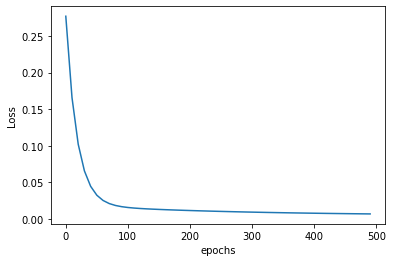

In [12]:
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

In [13]:

def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/home/krishna/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.45484403267596

<h2> Stochastic gradient descent </h2>

In [19]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    
    import random
    #shape will give rows and cols
    number_of_features = X.shape[1]
    
    w = np.ones(shape=number_of_features)
    b = 0
    
    epoch_list = []
    loss_list = []
    
    total_samples = X.shape[0]
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        
        y_predicted = np.dot(w, sample_x.T) + b  #(w1 * x1 + w2 * x2)
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_x - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        loss = np.square(sample_y - y_predicted)
        
        
        if i%100==0:
            loss_list.append(loss)
            epoch_list.append(i)
            
    return w, b, loss, loss_list, epoch_list

In [44]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.61569795, 0.51287706]), -0.0553266780253259, 0.010195917680086783)

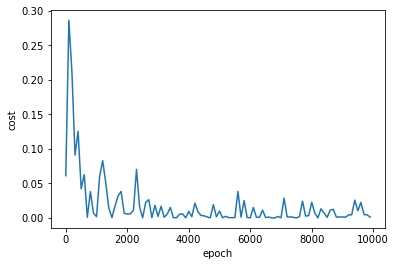

In [21]:

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

<h2>Mini batch Gradient descent </h2>

In [82]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    #shape will give rows and cols
    number_of_features = X.shape[1]
    
    w = np.ones(shape=number_of_features)
    b = 0
    
    epoch_list = []
    loss_list = []
    
    total_samples = X.shape[0]
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
    
    for i in range(epochs):
        
        for j in range(0, total_samples, batch_size):
            sample_x = X[j:j + batch_size]
            sample_y = y_true[j:j + batch_size]
            y_predicted = np.dot(w, sample_x.T) + b  #(w1 * x1 + w2 * x2)
            
            sample_size = len(sample_x)
            w_grad = -(2/sample_size)*(sample_x.T.dot(sample_y - y_predicted))
            b_grad = -(2/total_samples)*np.sum(sample_y - y_predicted)
        
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
        
            loss = np.mean(np.square(sample_y - y_predicted))
        
        if i%10==0:
            loss_list.append(loss)
            epoch_list.append(i)
            
    return w, b, loss, loss_list, epoch_list

In [83]:
w, b, cost, loss_list, epoch_list = mini_batch_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)

In [84]:
predict(2600,4,w,b)

/home/krishna/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


123.76454153692357

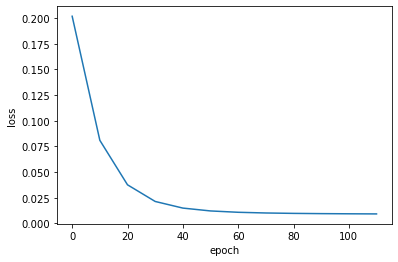

In [85]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(epoch_list,loss_list)

In [81]:
loss_list

[]